# Overview of Notebook 3
* Preliminaries
* Describing and summarizing data
* Visualization with matplotlib, pandas and seaborn
* Statistical analysis in SciPy and statsmodels

# Preliminaries
* Import stuff
* Load the preprocessed data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

# Disable annoying SettingWithCopyWarning
pd.options.mode.chained_assignment = None

In [118]:
# If you don't have the data locally, use the commented line instead
data = pd.read_csv('preprocessed_data.csv')

data.head()

,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,age_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
0,A006100,Scamp,2017-12-07 00:00:00,12/07/2017 12:00:00 AM,07/09/2007,Return to Owner,NaN,Dog,Neutered Male,10 years,...,0.0,1.0,Yellow,1,Spinone Italiano,NaN,NaN,NaN,NaN,NaN
1,A047759,Oreo,2014-04-07 15:12:00,04/07/2014 03:12:00 PM,04/02/2004,Transfer,Partner,Dog,Neutered Male,10 years,...,0.0,1.0,Tricolor,0,Dachshund,Dachshund,5.0,11.0,17.0,32.0
2,A134067,Bandit,2013-11-16 11:54:00,11/16/2013 11:54:00 AM,10/16/1997,Return to Owner,NaN,Dog,Neutered Male,16 years,...,0.0,1.0,Brown,1,Shetland Sheepdog,Shetland Sheepdog,13.0,14.0,12.0,24.0
3,A141142,Bettie,2013-11-17 11:40:00,11/17/2013 11:40:00 AM,06/01/1998,Return to Owner,NaN,Dog,Spayed Female,15 years,...,1.0,1.0,Black,1,Labrador Retriever,Labrador Retriever,21.0,24.0,49.0,77.0
4,A163459,Sasha,2014-11-14 19:28:00,11/14/2014 07:28:00 PM,10/19/1999,Return to Owner,NaN,Dog,Intact Female,15 years,...,1.0,0.0,Black,1,Miniature Schnauzer,NaN,NaN,NaN,NaN,NaN


# Describing and summarizing data
* It's a good idea to explore your data before you start modeling
* Surprising how often interesting results reflect overlooked problems

### A bird's eye view
* Simple pandas tools for describing/inspecting entire datasets
    * .describe(), .head() and .tail(), .dtypes(), etc...

In [119]:
# Describe the continuous variables in the dataset.
# We can also include categoricals, or select other percentiles.
data.describe(percentiles=[0.1,0.9],include='all').round(2)

,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,age_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
count,74637,49570,74637,74637,74637,74628,37463,74637,74637,74633,...,67567.00,67567.00,74637,74637.00,74637,33982,33982.00,33982.00,33982.00,33982.00
unique,74637,15016,61206,61206,6046,9,19,5,5,46,...,NaN,NaN,58,NaN,338,113,NaN,NaN,NaN,NaN
top,A006100,Bella,2016-04-18 00:00:00,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,...,NaN,NaN,Black,NaN,Domestic,American Staffordshire Terrier,NaN,NaN,NaN,NaN
freq,1,311,36,36,108,30512,20577,40342,25486,13545,...,NaN,NaN,18159,NaN,24968,6078,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.48,0.72,NaN,0.51,NaN,NaN,15.52,18.56,31.64,57.18
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.50,0.45,NaN,0.50,NaN,NaN,6.36,6.43,20.89,34.76
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,NaN,0.00,NaN,NaN,5.00,8.00,2.00,9.00
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,NaN,0.00,NaN,NaN,6.00,9.00,2.00,9.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,1.00,NaN,1.00,NaN,NaN,17.00,19.00,38.00,68.00
90%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.00,NaN,1.00,NaN,NaN,22.00,26.00,49.00,97.00


## Frequency counts
* 1-dimensional frequency counts can provide quick insight, diagnose problems
* What are the [top dog and cat names](http://dogtime.com/dog-names/female-dog-names/21032-top-10-most-popular-dog-and-cat-names-of-2014) in Austin?

In [120]:
top_n = 20
for species in ['Dog', 'Cat', 'Bird']:
    name_counts = data.query('animal == @species')['name'].value_counts()
    print("\nTop {} {} names:\n{}".format(top_n, species, name_counts[:top_n]))
    # " $i "


Top 20 Dog names:
Bella       262
Max         255
Daisy       185
Rocky       178
Princess    177
Luna        166
Buddy       165
Coco        151
Charlie     150
Lucy        142
Lola        128
Blue        114
Lucky       107
Zeus        103
Sadie       102
Chico       100
Duke         99
Jack         92
Cookie       90
Bear         89
Name: name, dtype: int64

Top 20 Cat names:
Luna        56
Kitty       49
Bella       47
Charlie     42
Lucy        37
*Charlie    36
Oliver      35
X           34
Smokey      34
Tiger       33
*Lily       29
Shadow      29
*Molly      28
Lily        28
*Jack       27
Milo        26
Max         26
Oreo        26
*Max        25
Princess    25
Name: name, dtype: int64

Top 20 Bird names:
Java            1
Greeki          1
Rogers          1
Aeos            1
Eddie           1
Tammy Wynett    1
Gracie          1
Cogburn         1
Cabana          1
Tucker          1
Candy           1
Daffy           1
*Lemon Head     1
Basil           1
Betty           1
Ro

### What the heck kind of name is "X"?

In [121]:
data.query('name == "X"').head(30)

,id,name,datetime,monthyear,date of birth,outcome,outcome_subtype,animal,sex_string,age_string,...,sex,sterilized,first_color,mixed_color,merge_key,breed_name,min_height,max_height,min_weight,max_weight
16598,A683202,X,2014-07-18 13:42:00,07/18/2014 01:42:00 PM,04/24/2014,Transfer,Partner,Cat,Intact Male,2 months,...,0.0,0.0,Blue,1,Domestic,NaN,NaN,NaN,NaN,NaN
16602,A683206,X,2014-07-18 12:58:00,07/18/2014 12:58:00 PM,07/08/2013,Transfer,Partner,Cat,Intact Female,1 year,...,1.0,0.0,Orange Tabby,1,Domestic,NaN,NaN,NaN,NaN,NaN
16603,A683207,X,2014-07-22 11:56:00,07/22/2014 11:56:00 AM,07/08/2013,Transfer,Partner,Cat,Spayed Female,1 year,...,1.0,1.0,Blue,1,Domestic,NaN,NaN,NaN,NaN,NaN
16604,A683208,X,2014-07-21 10:40:00,07/21/2014 10:40:00 AM,07/08/2013,Transfer,Partner,Cat,Spayed Female,1 year,...,1.0,1.0,Blue Tabby,1,Domestic,NaN,NaN,NaN,NaN,NaN
16606,A683210,X,2014-07-18 13:00:00,07/18/2014 01:00:00 PM,01/09/2008,Transfer,Partner,Cat,Spayed Female,6 years,...,1.0,1.0,Tortie,1,Domestic,NaN,NaN,NaN,NaN,NaN
16607,A683211,X,2014-07-21 10:41:00,07/21/2014 10:41:00 AM,07/09/2008,Transfer,Partner,Cat,Neutered Male,6 years,...,0.0,1.0,Brown Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN
16608,A683212,X,2014-07-24 12:48:00,07/24/2014 12:48:00 PM,07/08/2013,Transfer,Partner,Cat,Neutered Male,1 year,...,0.0,1.0,Brown Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN
16609,A683213,X,2014-07-23 10:11:00,07/23/2014 10:11:00 AM,06/17/2014,Transfer,Partner,Cat,Intact Male,1 month,...,0.0,0.0,Brown Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN
16610,A683214,X,2014-07-21 10:41:00,07/21/2014 10:41:00 AM,07/08/2013,Transfer,Partner,Cat,Spayed Female,1 year,...,1.0,1.0,Blue Tabby,1,Domestic,NaN,NaN,NaN,NaN,NaN
16611,A683215,X,2014-07-21 10:41:00,07/21/2014 10:41:00 AM,07/08/2013,Transfer,Partner,Cat,Neutered Male,1 year,...,0.0,1.0,Brown Tabby,0,Domestic,NaN,NaN,NaN,NaN,NaN


### Contingency tables
* It's useful to examine contingency tables (or crosstabs) for pairs of variables
* Normalized crosstabs can be particularly informative

In [122]:
dogs = data.query('animal == "Dog"')

dogs['breed']

0               Spinone Italiano Mix
1                          Dachshund
2                  Shetland Sheepdog
3        Labrador Retriever/Pit Bull
4            Miniature Schnauzer Mix
                    ...             
74618        Chihuahua Shorthair Mix
74619        Chihuahua Shorthair Mix
74621              Alaskan Husky Mix
74623            Norfolk Terrier Mix
74636            German Shepherd Mix
Name: breed, Length: 40342, dtype: object

In [123]:
data['outcome'][:10]

0    Return to Owner
1           Transfer
2    Return to Owner
3    Return to Owner
4    Return to Owner
5    Return to Owner
6           Relocate
7    Return to Owner
8    Return to Owner
9    Return to Owner
Name: outcome, dtype: object

In [124]:
ctab = pd.crosstab(data['outcome'], data['animal'])
type(ctab.sum(1).sort_values(ascending=False).index[0])

str

In [125]:
# Select only dogs
dogs = data.query('animal=="Dog"')

# Keep only common breeds--estimates won't be reliable for uncommon ones
dogs = dogs.groupby('breed').filter(lambda x: len(x) >= 100)

# How many breeds left?
print("Unique breeds:", dogs['breed'].nunique())

# Generate contingency table
ctab = pd.crosstab(dogs['breed'], data['outcome'])

# Sort in descending order of number of animals of each breed
order = ctab.sum(1).sort_values(ascending=False).index
# print(order)
ctab = ctab.loc[order, :]

# Show just the top 10
ctab.iloc[:, :]

Unique breeds: 53


outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
breed,,,,,,,,
Pit Bull Mix,1874,13,1,446,6,1583,32,1237
Chihuahua Shorthair Mix,2101,27,1,153,1,1060,12,1217
Labrador Retriever Mix,2124,17,0,122,2,1017,8,1045
German Shepherd Mix,807,6,1,54,0,480,5,374
Australian Cattle Dog Mix,515,5,0,29,0,215,2,205
Dachshund Mix,363,1,1,17,0,187,3,200
Miniature Poodle Mix,248,3,1,18,0,194,1,127
Boxer Mix,253,1,0,27,1,167,2,134
Border Collie Mix,304,1,0,17,0,138,1,118


In [126]:
lst = [ False for i in range(53)] 
lst[1]=True
lst

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

#### Normalized crosstabs
We can normalize the crosstab by dividing by the sum of the rows and/or columns

In [127]:
# Normalize by row to show proportion of animals accounted for by each outcome
nctab = pd.crosstab(dogs['breed'], data['outcome'], normalize='index')
nctab = nctab.round(2)  # Round to 2 decimal places for clarity
nctab.iloc[:10, :]

outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
breed,,,,,,,,
American Bulldog Mix,0.41,0.00,0.0,0.06,0.0,0.28,0.00,0.24
American Pit Bull Terrier Mix,0.37,0.00,0.0,0.06,0.0,0.30,0.00,0.27
American Staffordshire Terrier Mix,0.40,0.00,0.0,0.09,0.0,0.33,0.01,0.18
Anatol Shepherd Mix,0.60,0.01,0.0,0.01,0.0,0.14,0.00,0.24
Australian Cattle Dog Mix,0.53,0.01,0.0,0.03,0.0,0.22,0.00,0.21
Australian Kelpie Mix,0.55,0.00,0.0,0.02,0.0,0.17,0.00,0.26
Australian Shepherd Mix,0.46,0.00,0.0,0.03,0.0,0.29,0.00,0.21
Basset Hound Mix,0.36,0.01,0.0,0.05,0.0,0.41,0.00,0.17
Beagle Mix,0.43,0.00,0.0,0.02,0.0,0.27,0.00,0.28


Let's sort by specific outcomes to see, e.g., which breeds are euthanized or adopted most often.

In [128]:
# Top 10 breeds by euthanasia rate
nctab.sort_values('Euthanasia', ascending=False).iloc[:10]


outcome,Adoption,Died,Disposal,Euthanasia,Missing,Return to Owner,Rto-Adopt,Transfer
breed,,,,,,,,
Chow Chow Mix,0.25,0.01,0.0,0.15,0.0,0.34,0.00,0.26
Pit Bull,0.31,0.01,0.0,0.11,0.0,0.40,0.01,0.17
American Staffordshire Terrier Mix,0.40,0.00,0.0,0.09,0.0,0.33,0.01,0.18
Pit Bull Mix,0.36,0.00,0.0,0.09,0.0,0.30,0.01,0.24
Rottweiler Mix,0.38,0.01,0.0,0.08,0.0,0.36,0.01,0.17
American Bulldog Mix,0.41,0.00,0.0,0.06,0.0,0.28,0.00,0.24
Labrador Retriever/Pit Bull,0.37,0.00,0.0,0.06,0.0,0.28,0.01,0.28
American Pit Bull Terrier Mix,0.37,0.00,0.0,0.06,0.0,0.30,0.00,0.27
Doberman Pinsch Mix,0.27,0.01,0.0,0.06,0.0,0.38,0.00,0.28


#### Drilling down further
* Euthanasia is a pretty general category
* Why are Chow Chows and Pit bulls being euthanized at such a high rate?
* Repeat with outcome subtype

In [129]:
# We can do the same thing for outcome subtype
data['outcome_subtype'] = data['outcome_subtype'].fillna('Unknown')
sctab = pd.crosstab(dogs['breed'], data['outcome_subtype'], normalize='index').round(2)

# We could add a column for number of dogs in each breed
sctab['num_dogs'] = dogs.groupby('breed')['animal'].count()

# sort in descending order of 'aggressive'
sctab.sort_values('Aggressive', ascending=False)[:10]

outcome_subtype,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,Medical,Offsite,Partner,Possible Theft,Rabies Risk,Suffering,Unknown,num_dogs
breed,,,,,,,,,,,,,,,,,,
Pit Bull,0.08,0.0,0.0,0.00,0.00,0.0,0.11,0.0,0.01,0.0,0.01,0.01,0.17,0.0,0.01,0.02,0.59,196
American Staffordshire Terrier Mix,0.05,0.0,0.0,0.03,0.01,0.0,0.03,0.0,0.00,0.0,0.00,0.01,0.21,0.0,0.01,0.00,0.66,176
American Bulldog Mix,0.04,0.0,0.0,0.01,0.00,0.0,0.07,0.0,0.00,0.0,0.00,0.00,0.25,0.0,0.00,0.00,0.61,260
Pit Bull Mix,0.04,0.0,0.0,0.01,0.00,0.0,0.04,0.0,0.00,0.0,0.00,0.00,0.25,0.0,0.00,0.02,0.61,5192
Labrador Retriever/Pit Bull,0.04,0.0,0.0,0.00,0.00,0.0,0.07,0.0,0.00,0.0,0.01,0.00,0.31,0.0,0.01,0.01,0.57,197
Chow Chow Mix,0.03,0.0,0.0,0.02,0.00,0.0,0.01,0.0,0.01,0.0,0.02,0.00,0.26,0.0,0.01,0.08,0.57,129
Staffordshire Mix,0.02,0.0,0.0,0.01,0.00,0.0,0.06,0.0,0.01,0.0,0.00,0.02,0.14,0.0,0.00,0.02,0.73,303
Rottweiler Mix,0.02,0.0,0.0,0.01,0.00,0.0,0.03,0.0,0.01,0.0,0.00,0.00,0.18,0.0,0.00,0.05,0.71,278
Labrador Retriever/German Shepherd,0.02,0.0,0.0,0.00,0.00,0.0,0.12,0.0,0.00,0.0,0.00,0.00,0.22,0.0,0.01,0.01,0.62,121


### What does this mean?
~1 in 8 Pit Bulls that pass through AAC are euthanized (and 1 in 7 Chow Chows!). Some possible interpretations:
* Pit bulls are much more dangerous than other dog breeds
    * A genetic disposition?
    * Abusive owners?
* There could be a bias against pit bulls, causing many to be unnecessarily euthanized
* Mixed-breed dogs with behavioral problems may be more likely to be labeled pit bulls
* Data artifact (e.g., smaller samples for these breeds)
* Others?

# Visualization in Python
* That thing about a picture being worth...
* Python has a rich visualization ecosystem
* The primary platform for visualization in Python is [matplotlib](http://matplotlib.org/)
* Most other visualization platforms build on matplotlib
    * But there are others--e.g., [Altair](https://altair-viz.github.io/), [Bokeh](http://bokeh.pydata.org/en/latest/), [Plotly](https://plot.ly/python/)...


## Matplotlib
* Highly object-oriented (contrast with, e.g., R)
    * Easy to modify/customize plots created in different packages
* Documentation is comprehensive, though not always very well organized
    * The [visualization chapter](http://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb) in Jake Vanderplas's [book](https://github.com/jakevdp/PythonDataScienceHandbook/blob/599aa0fe3f882c0001670e676e5a8d43b92c35fc/notebooks/Index.ipynb) is spectacular
    * A good way to learn is to find a plot similar to what you want in the [matplotlib gallery](https://matplotlib.org/gallery.html#) and modify it
* Provides a basic set of high-level plots (barplot, scatter, etc.)
* Beyond that, API has a fairly steep learning curve

### Simple examples

#### Scatterplot

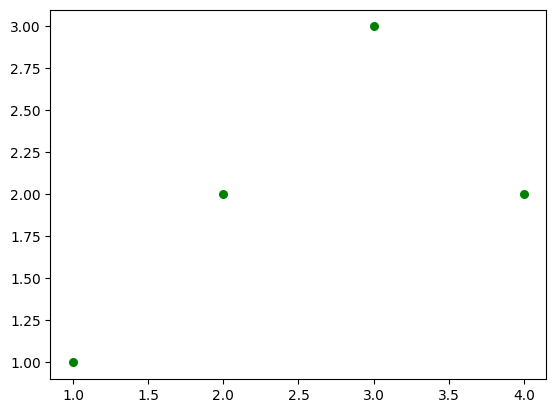

In [130]:
# Scatterplot of minimum breed weight vs. height
plt.scatter([1,2,3,4] , [1,2,3,2], color='green', s=30)


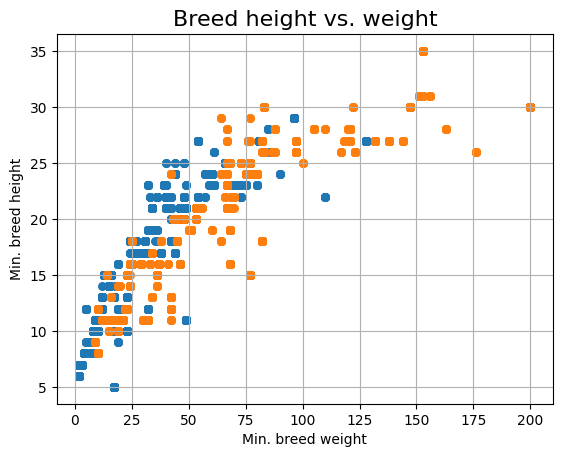

In [131]:
# Scatterplot of minimum breed weight vs. height
plt.scatter(data['min_weight'], data['min_height'], s=30)
plt.scatter(data['max_weight'], data['max_height'], s=30)
# Add axis labels
plt.xlabel("Min. breed weight")
plt.ylabel("Min. breed height")

plt.grid()
# Add title
plt.title("Breed height vs. weight", fontsize=16); 

#### Line plot
* Let's plot the frequency of each outcome by year (2013 - 2018)...

year
2013     588
2014    2532
2015    2710
2016    2612
2017    2749
2018    1101
Name: outcome, dtype: int64
year
2013    1365
2014    6038
2015    5758
2016    4741
2017    4787
2018    1447
Name: outcome, dtype: int64
year
2013    1
2014    5
2015    4
2016    4
2017    2
2018    1
Name: outcome, dtype: int64
year
2013    1611
2014    6134
2015    6398
2016    6987
2017    7131
2018    2251
Name: outcome, dtype: int64
year
2013     462
2014    1847
2015    1461
2016    1161
2017    1084
2018     409
Name: outcome, dtype: int64
year
2013     25
2014    125
2015    185
2016    179
2017    161
2018     47
Name: outcome, dtype: int64
year
2017    107
2018     63
Name: outcome, dtype: int64
year
2013     2
2014     5
2015    11
2016    19
2017     4
2018     3
Name: outcome, dtype: int64
year
2013     13
2014    107
2015     24
2016     75
2017     75
2018     17
Name: outcome, dtype: int64
Series([], Name: outcome, dtype: int64)


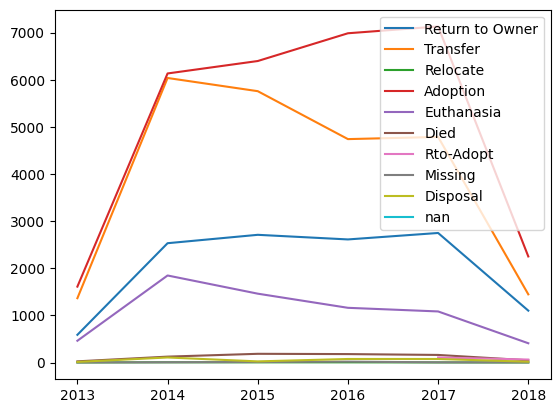

In [132]:
# Get a list of unique outcomes
outcomes = data['outcome'].unique()

# Loop over outcomes and plot a line for each one
for oc in outcomes:
    # Get data subset for only this outcome
    oc_data = data.query('outcome==@oc')
    # Count number of events in each year
    oc_count_by_year = oc_data.groupby('year')['outcome'].count()
    print(oc_count_by_year)
    # Plot a line--note the addition of the label, which will be
    # used by the legend later.
    plt.plot(oc_count_by_year, label=oc)

# This works, but is a bit ugly... can we position it better?
plt.legend()

#### Heatmap

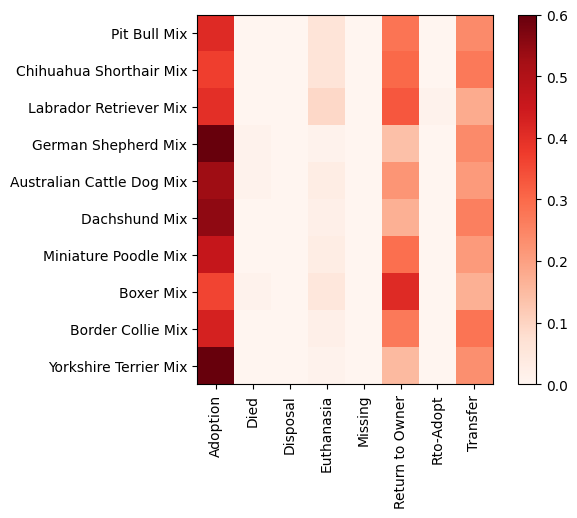

In [133]:
# # A heatmap of the crosstab we made earlier
plt.imshow(nctab[:10], cmap='Reds')
plt.yticks(np.arange(10), ctab[:10].index)
plt.xticks(np.arange(8), ctab.columns, rotation=90)
plt.colorbar();

### Less simple examples

#### Stacked bar plot
* Let's write some custom code to generate a nice stacked bar plot
* Later, we'll see how to do this with much less code

In [134]:
ct = pd.crosstab(data['outcome'], data['animal'])
ct.shape

(9, 5)

In [135]:
len(ct)

9

In [136]:
n_bins = 10
sns.color_palette('Set2', n_bins)

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

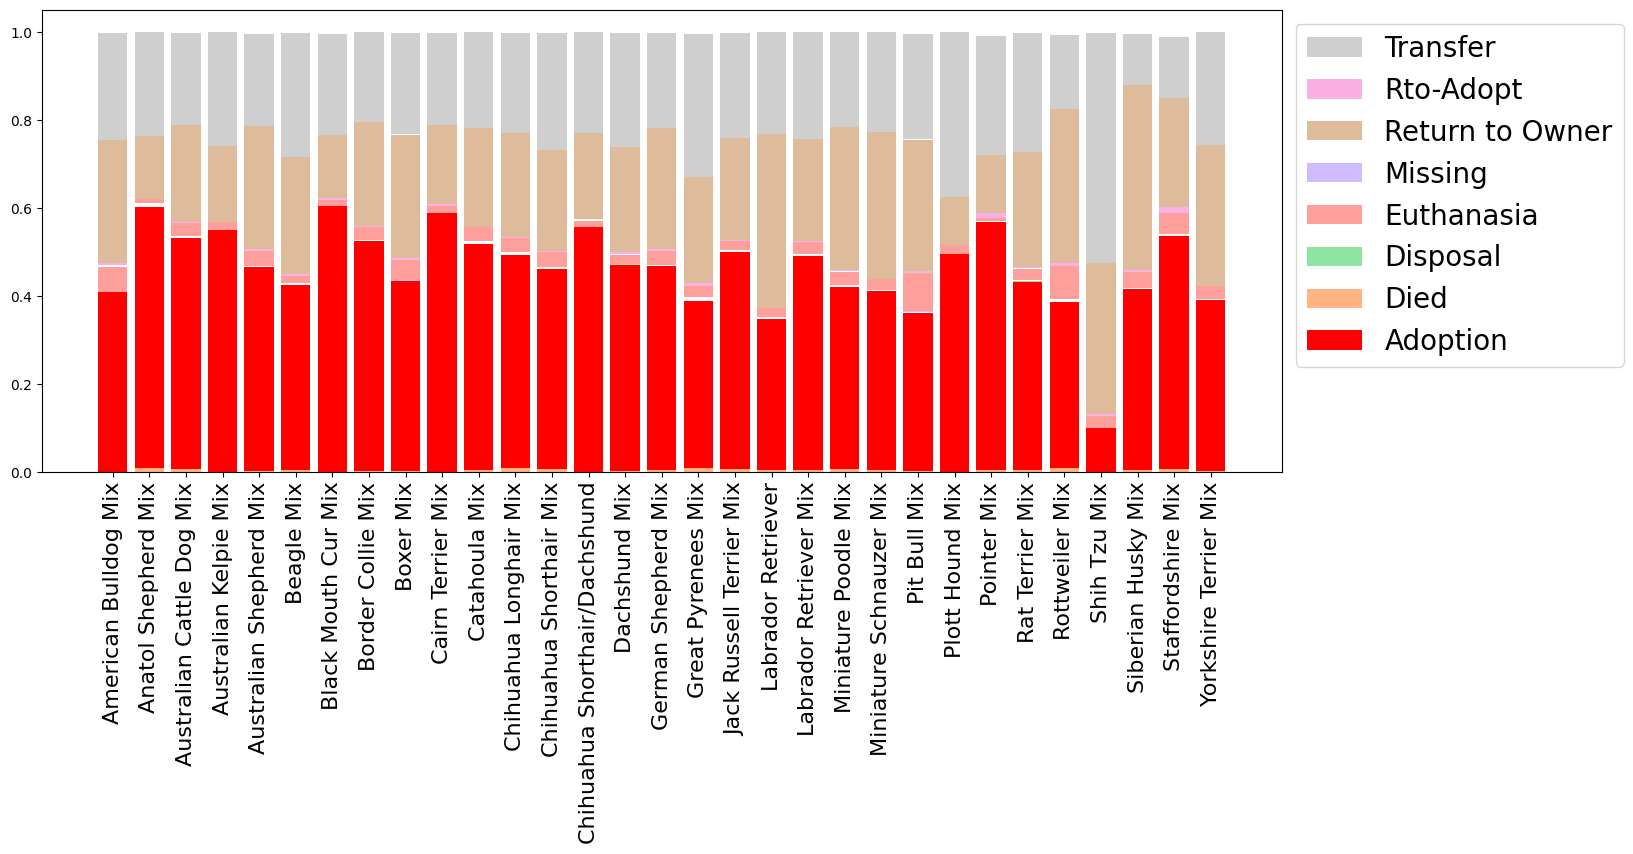

In [137]:
# To prevent clutter, let's show bars only for breeds with > 200 occurrences
min200 = dogs.groupby('breed').filter(lambda x: len(x) >= 200)

ct = pd.crosstab(min200['breed'], min200['outcome'], normalize='index')

n_breeds = ct.shape[0]
breed_x = np.arange(n_breeds)
labels = ct.columns
n_bins = len(labels)

# Set up figure
plt.figure(figsize=(16, 6))

# Set up colors--we use seaborn's color_palette utility for this
colors = sns.color_palette('pastel', n_bins)
colors[0] = (1,0,0)

# Plot the first color
plt.bar(breed_x, ct.iloc[:, 0], label=labels[0], color=colors[0])

# Plot the other colors
for i in range(1, len(labels)):
    bottom = ct.iloc[:, :(i-1)].sum(1)
    plt.bar(breed_x, ct.iloc[:, i], label=labels[i],
            bottom=bottom, color=colors[i])
    
# Add x-axis labels
plt.xticks(np.arange(n_breeds), ct.index, rotation=90, fontsize=16);

# Add the legend outside the plot.
# The handles stuff is just to reverse the label order to match the bars
# plt.legend(bbox_to_anchor=(1, 1), fontsize=20);

# # A slightly more complicated version if we want to reverse the legend order
# # to match the bars more closely
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), fontsize=20,);

### Customization in matplotlib
* matplotlib is infinitely customizable
* As in most modern plotting environments, you can do virtually anything
* You just have to be willing to spend enough time on it

#### Matplotlib styles
<img src="https://raw.githubusercontent.com/rasbt/matplotlib-gallery/master/images/formatting_4.png">
https://twitter.com/rasbt/status/731205324187795457

In [138]:
data['animal'].isin(['Dog'])[:10]

0     True
1     True
2     True
3     True
4     True
5     True
6    False
7     True
8     True
9    False
Name: animal, dtype: bool

In [139]:
# A whole bunch of custom plotting code, just to generate
# a relatively simple result.
def plot_outcomes_by_time(data, unit='hour', min_unit=None, max_unit=None,
                          animal=None, panel=None, agg_func='count'):
    ''' Custom plotting functions that displays the number of
    outcomes of each type as a function of a unit of time and
    (optionally) any categorical variable.
    '''
    if animal is not None:
        data = data[data['animal'].isin(animal)]
    if panel is not None:
        if panel == 'year':
            panel_vars = [2017, 2015, 2016, 2014]
        else:
            if panel == 'day' :
                panel_vars = [0, 1, 2, 3,4,5,6]
            else :
                panel_vars = data[panel].unique()
        n_panels = len(panel_vars)
        fig, axes = plt.subplots(1, n_panels, figsize=(5*n_panels, 4),
                                 sharex=True, sharey=True)
    else:
        axes = [plt.gca()]

    outcomes = ['Adoption', 'Transfer', 'Return to Owner', 'Euthanasia']
    dummies = pd.get_dummies(data['outcome'])
    data = pd.concat([data, dummies], axis=1)
    
    if min_unit is not None:
        data = data[data[unit] >= min_unit]
    if max_unit is not None:
        data = data[data[unit] <= max_unit]
    
    for oc in outcomes:
        groupers = [unit]
        if panel is not None:
            groupers.append(panel)
        line = data.query('outcome==@oc')\
            .groupby(groupers)[oc].agg(agg_func).reset_index()
        if panel is not None:
            for i, pan in enumerate(panel_vars):
                pan_line = line[line[panel]==pan]
                axes[i].plot(pan_line[unit], pan_line[oc], label=oc, lw=3)
                axes[i].set_title('{}: {}'.format(panel, pan), fontsize=18)
                axes[i].set_xlabel(unit, fontsize=18)
                axes[i].set_ylabel("No. of outcomes", fontsize=18)
    plt.legend(fontsize=16, loc='best')

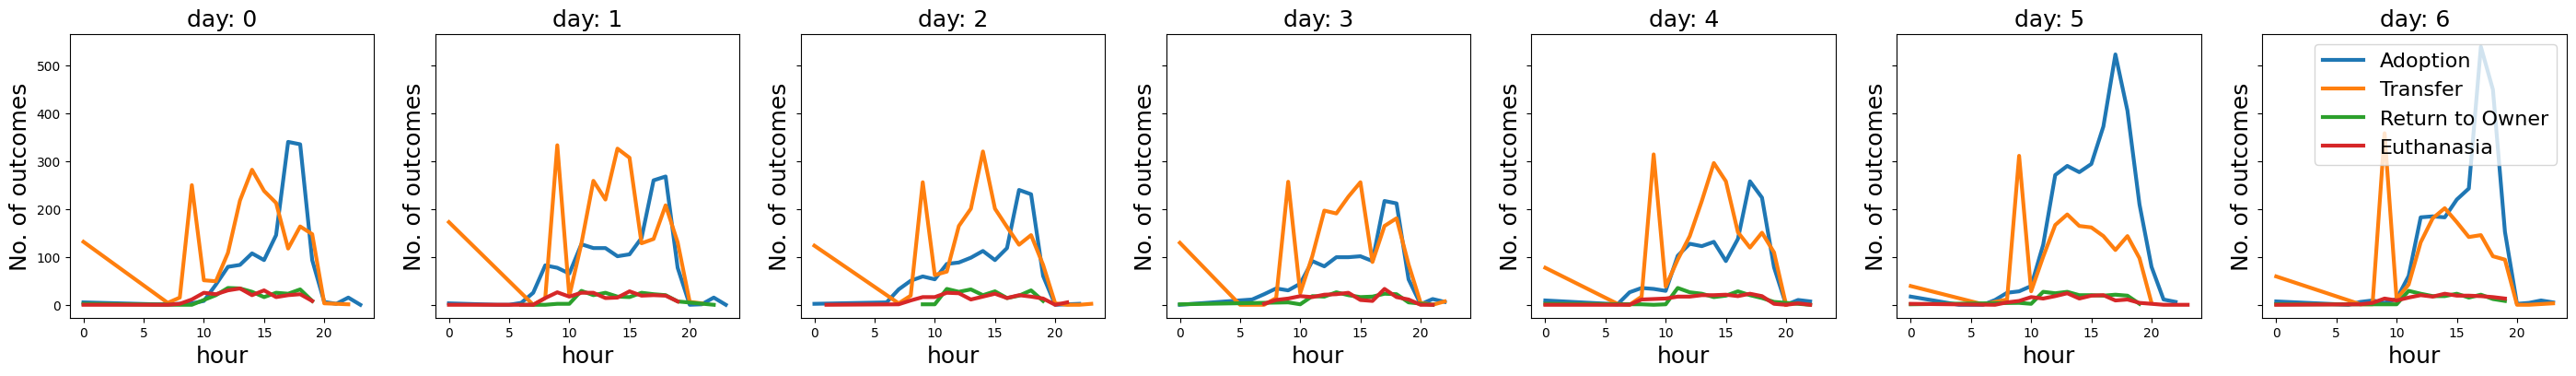

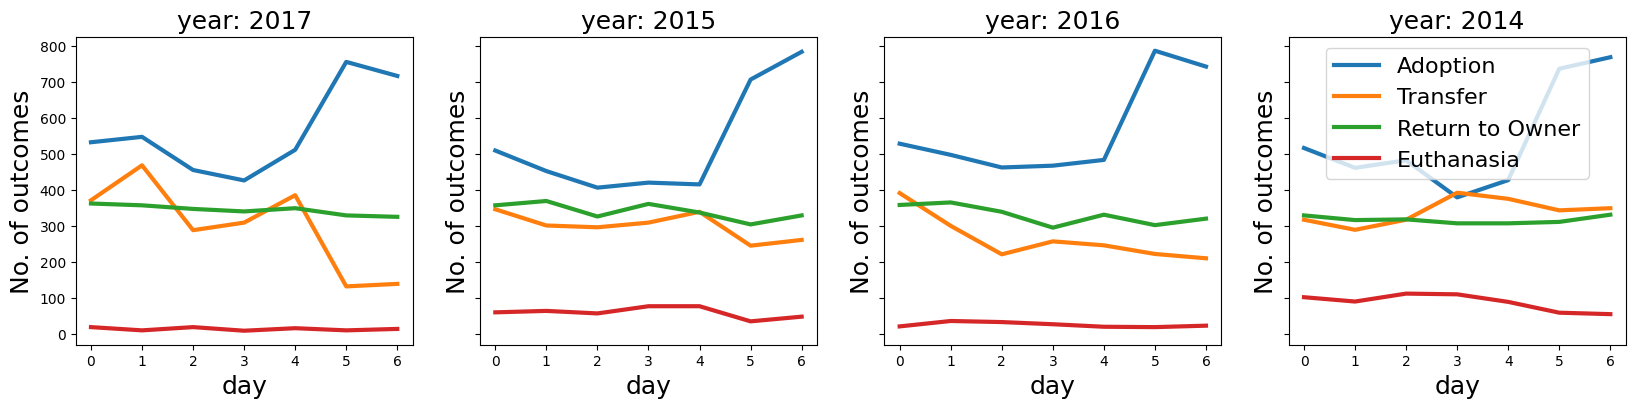

In [140]:
# Now we can flexibly call our custom plotter

# Plot outcome counts by hour, paneling by animal
plot_outcomes_by_time(data, animal=['Cat'], unit='hour', panel='day')

# Plot outcome counts by day of week, only for dogs, paneling by year
plot_outcomes_by_time(data, animal=['Dog'], unit='day', panel='year')

### Alternative interfaces to matplotlib
* Most of the time you don't want to spend three hours making a nice barplot
* The appeal of packages like ggplot2 (in R) is power and elegance with speed
* A number of high-level Python plotting packages built on matplotlib exist
* You can always customize any plot after the fact

### ggplot2 for Python
* ggplot2 has been (mostly) ported to Python as [plotnine](https://github.com/has2k1/plotnine)
* Syntax is very similar to ggplot2 in R

c:\Program Files\Python311\Lib\site-packages\plotnine\layer.py:411: PlotnineWarning: geom_bar : Removed 4 rows containing missing values.


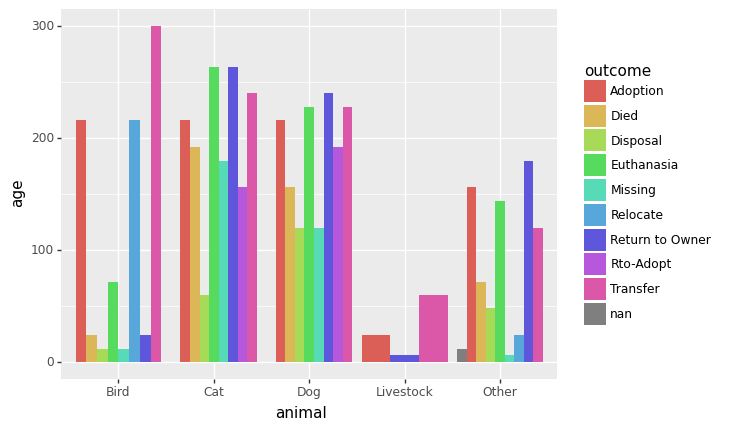

<ggplot: (128260461073)>

In [141]:
# Grouped bar plot with animal and outcome on x-axis and age on y-axis
from plotnine import *
ggplot(data, aes(x='animal', y='age', fill='outcome')) + geom_bar(stat='identity', position='dodge')

### Plotting in pandas
* Pandas provides basic plotting functionality
* Well-integrated with DataFrames
* Often the easiest way to quickly explore the data

#### Visualizing distributions in pandas

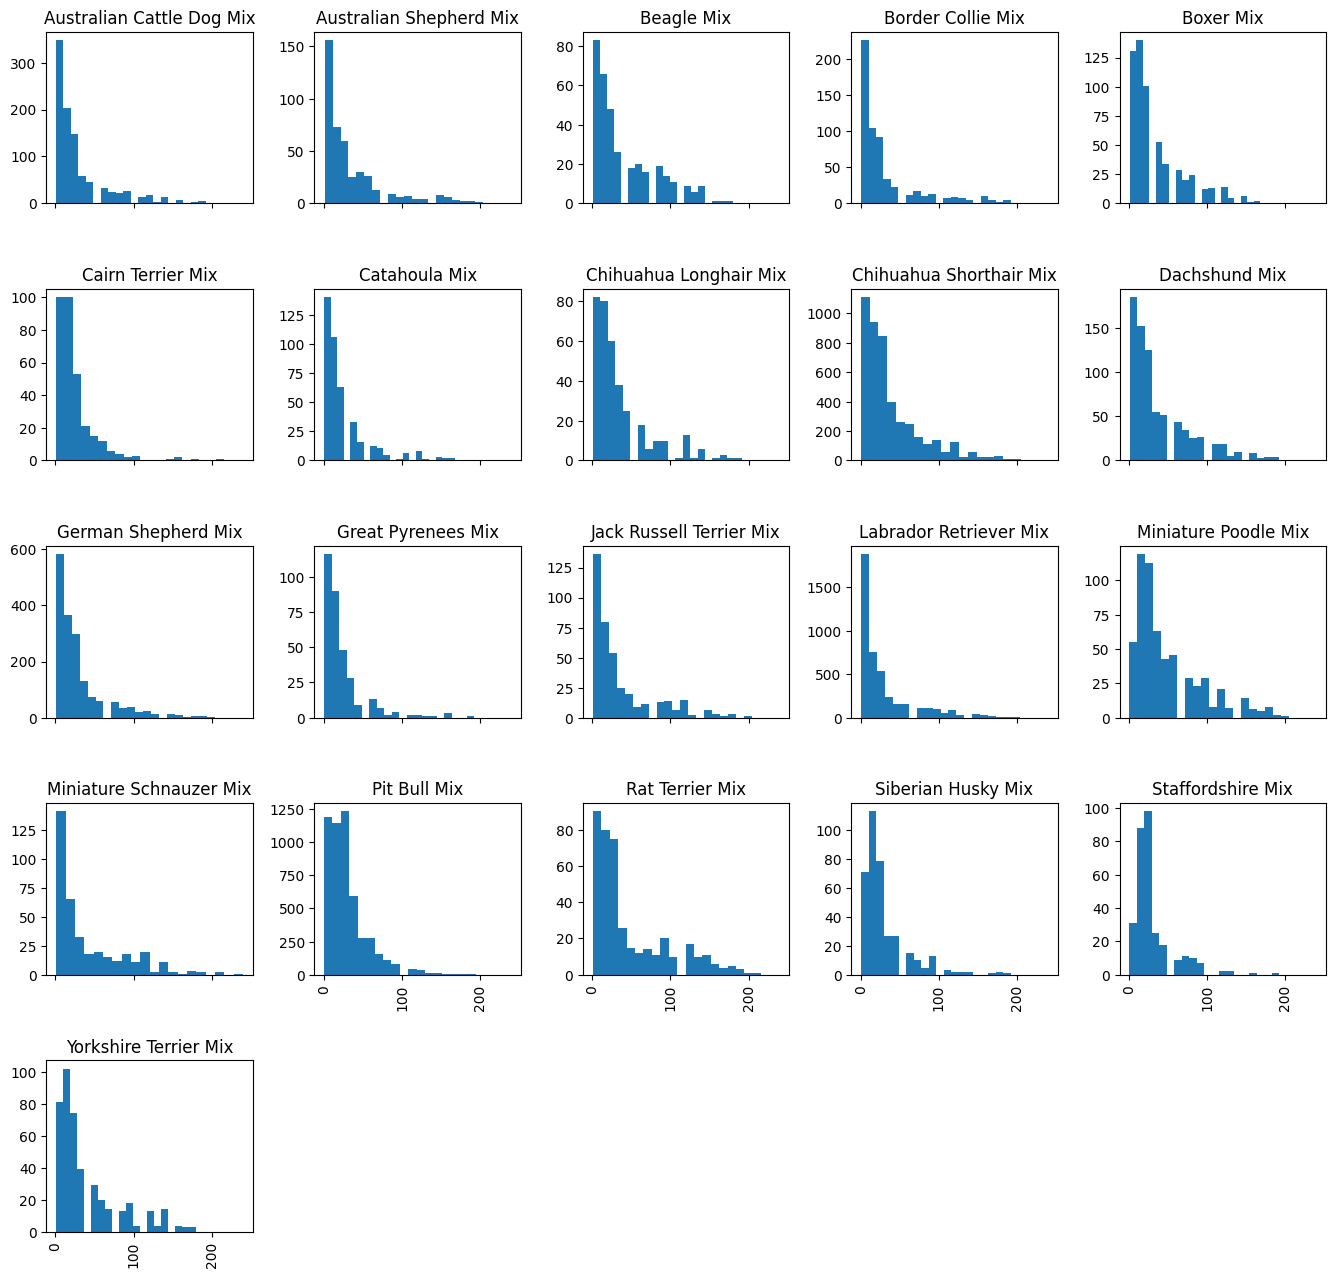

In [142]:
# To keep things simple, let's select only breeds with > 300 observations
many_dogs = dogs.groupby('breed').filter(lambda x: len(x)>300)

# Plot age histograms for all remaining breeds--with shared x-axis
# to facilitate comparisons between breeds.
many_dogs['age'].hist(by=many_dogs['breed'], bins=20, sharex=True);

# Embiggen the figure a bit
plt.gcf().set_size_inches((16, 16))

#### Stacked bars, the easy way

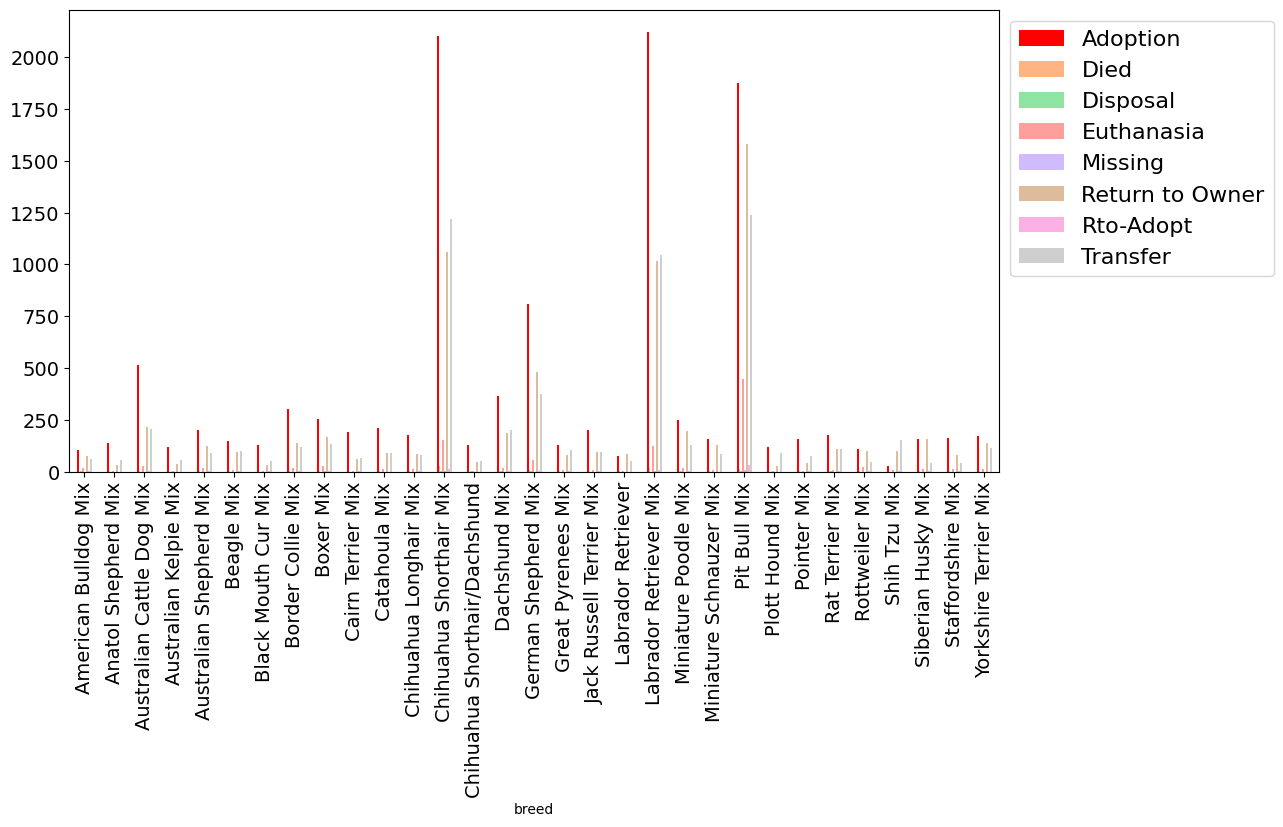

In [143]:
# Our normalized cross-tab from earlier, with only breeds that
# have a minimum of 200 observations
min200 = dogs.groupby('breed').filter(lambda x: len(x) >= 200)
ct = pd.crosstab(min200['breed'], min200['outcome'])

# The same result, with much less code
ct.plot.bar(stacked=False, fontsize=14, color=colors)

# # Add the legend outside the plot
plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

# # Resize everything
plt.gcf().set_size_inches((12, 6))

# # Ruh-roh! Ugly colors! Fortunately, we can manually pass in a list of
# # colors to use via the colors argument to plot.bar(). We could reuse
# # the color list we created earlier in seaborn, for example.

## Plotting in seaborn
* Seaborn is a high-level plotting library based on matplotlib
* Designed to produce attractive figures in very little code
* _Great_ [documentation](https://stanford.edu/~mwaskom/software/seaborn/index.html)
* Most seaborn plotting functions accept pandas DataFrames
* Complete customization of seaborn plots is possible using matplotlib

### Heatmaps

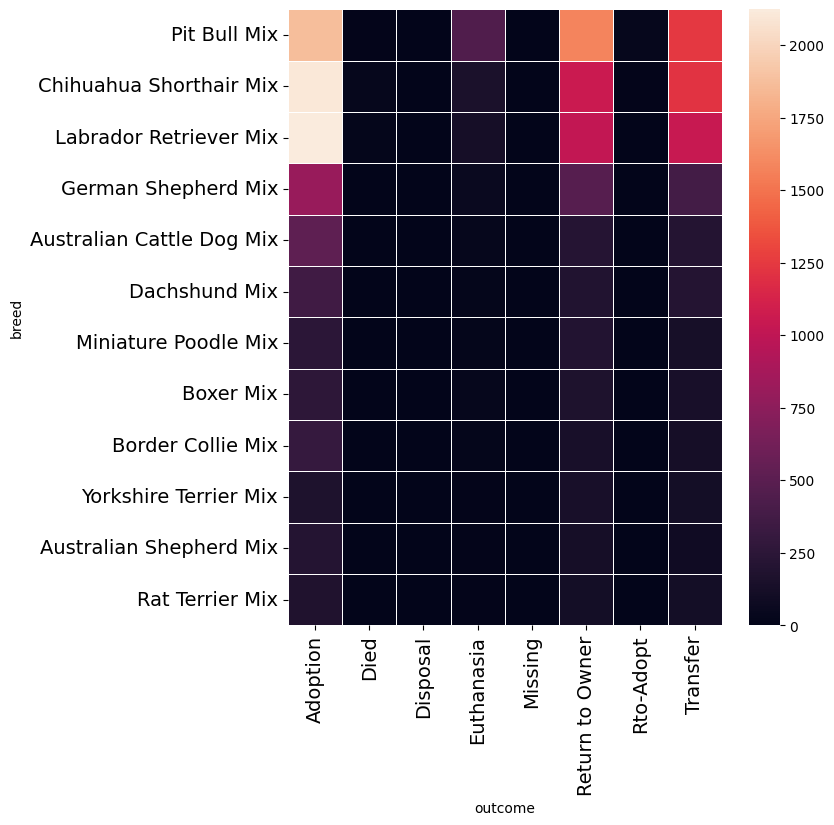

In [144]:
# The same contingency table from earlier.

ax = sns.heatmap(ctab[:12], annot=False, fmt='d', linewidths=.5,
                 annot_kws={'size': 14})

# Customize the label size and figure size in base matplotlib.
# Notice we can access all axis and figure properties through
# # the handle we saved when calling seaborn.
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((7, 8))  # update the plot size

#### Pairwise correlations between all numeric variables in the dataset

In [145]:
data.query('animal=="Dog"').corr().round(2)[:10]

C:\Users\pegga\AppData\Local\Temp\ipykernel_20520\626010170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,day,hour,month,year,age,sex,sterilized,mixed_color,min_height,max_height,min_weight,max_weight
day,1.00,0.04,-0.00,-0.02,-0.02,0.01,0.05,0.02,0.01,0.01,0.01,0.01
hour,0.04,1.00,-0.01,-0.05,-0.08,0.01,0.13,0.01,-0.01,-0.01,-0.01,-0.01
month,-0.00,-0.01,1.00,-0.29,-0.01,0.00,-0.02,0.00,0.00,0.00,0.00,0.00
year,-0.02,-0.05,-0.29,1.00,0.01,-0.01,-0.03,0.02,0.05,0.04,0.04,0.04
age,-0.02,-0.08,-0.01,0.01,1.00,-0.02,0.06,-0.06,-0.09,-0.09,-0.09,-0.09
sex,0.01,0.01,0.00,-0.01,-0.02,1.00,-0.00,0.00,0.01,0.01,-0.00,-0.00
sterilized,0.05,0.13,-0.02,-0.03,0.06,-0.00,1.00,0.01,-0.00,0.01,-0.01,-0.01
mixed_color,0.02,0.01,0.00,0.02,-0.06,0.00,0.01,1.00,0.04,0.03,0.02,0.04
min_height,0.01,-0.01,0.00,0.05,-0.09,0.01,-0.00,0.04,1.00,0.98,0.93,0.92
max_height,0.01,-0.01,0.00,0.04,-0.09,0.01,0.01,0.03,0.98,1.00,0.93,0.93


C:\Users\pegga\AppData\Local\Temp\ipykernel_20520\2631429056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


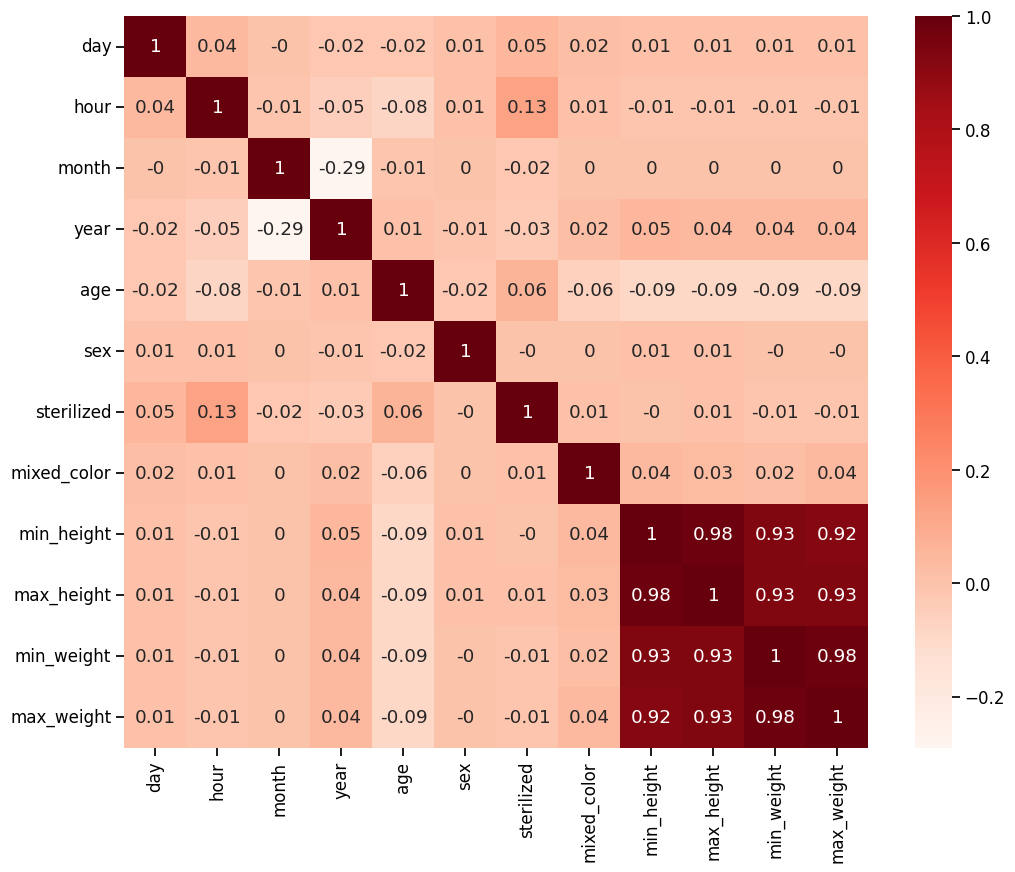

In [146]:
# Plot a heatmap of pairwise correlations between all continuous variables
r = data.query('animal=="Dog"').corr().round(2)

with sns.plotting_context("notebook", font_scale=1.1):
    ax = sns.heatmap(r, annot=True, cmap='Reds')
    ax.figure.set_size_inches((12, 9.5))

* Don't like the color palette (`cmap` argument)? Pick a [different one](https://matplotlib.org/examples/color/colormaps_reference.html)!
* Looks like the weight and height variables are almost completely redundant
* Why do month and year show a strong negative correlation (-0.37)?
* Illustrates the need for caution
    * Most "interesting" findings turn out to have banal explanations!

### Pair plots
* Systematic inspection of pairwise relationships is very useful
* We've established that some breeds have very different outcomes
* How do outcomes relate to one another at the breed level?
    * Do some outcomes trade off against others?

C:\Users\pegga\AppData\Local\Temp\ipykernel_20520\2252904707.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


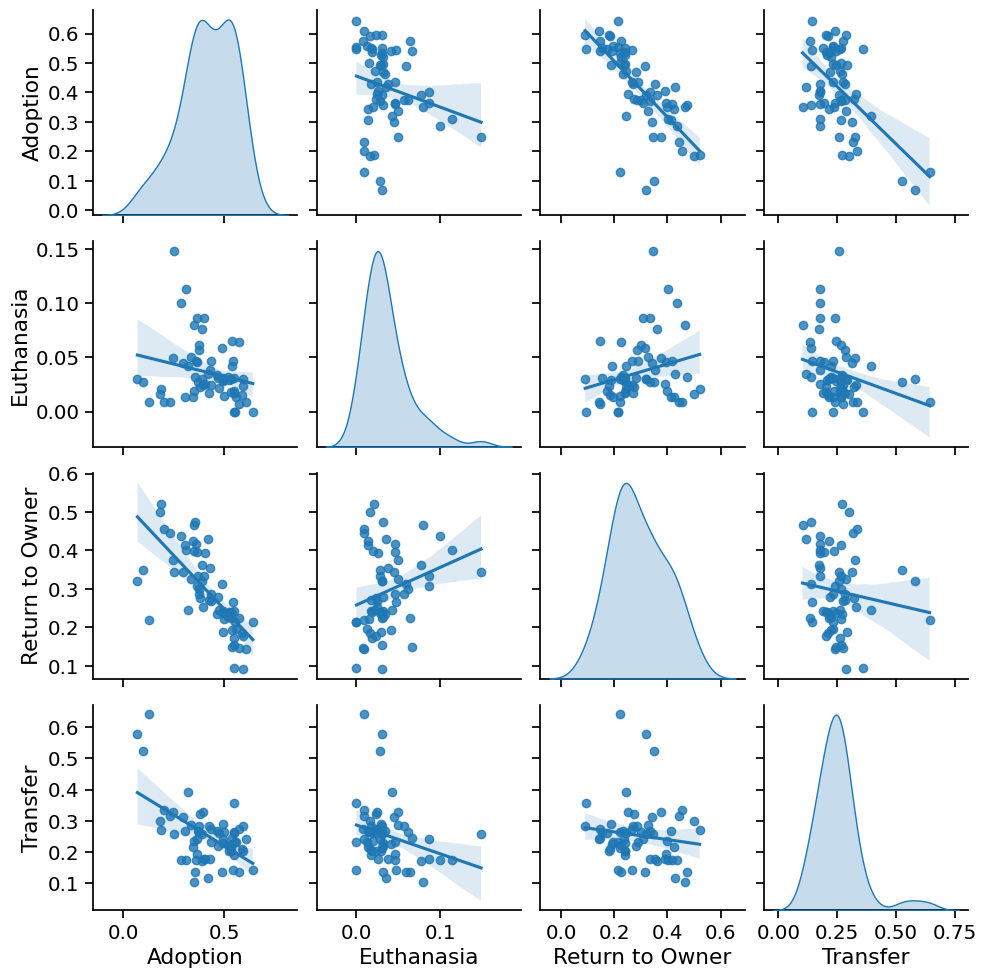

In [147]:
# Breed-level correlations between different outcomes and traits

# Restrict to breed with minimum 50 dogs and outcomes with min. 200 occurrences
tmp_data = data.query('animal=="Dog"')
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 200)
tmp_data = tmp_data.groupby('breed').filter(lambda x: len(x) >= 50)

# Dummy-code the outcomes as binary indicators and concatenate with original data
outcomes = pd.get_dummies(tmp_data['outcome'])
tmp_data = pd.concat([tmp_data, outcomes], axis=1)

# Group by breed and calculate means
tmp_data = tmp_data.groupby('breed').mean().dropna().reset_index()
tmp_data = tmp_data[['Adoption', 'Euthanasia', 'Return to Owner', 'Transfer']]
dog_breed_means = tmp_data  # Save for later
#{}
# The actual plot ting code is just this
with sns.plotting_context("notebook", font_scale=1.3):  # Make text bigger
    sns.pairplot(tmp_data, diag_kind='kde', kind='reg')

### Bar plots
* Let's explore how outcomes differ as a function of the variables in our dataset
* We'll start by visualizing the raw counts for different animals

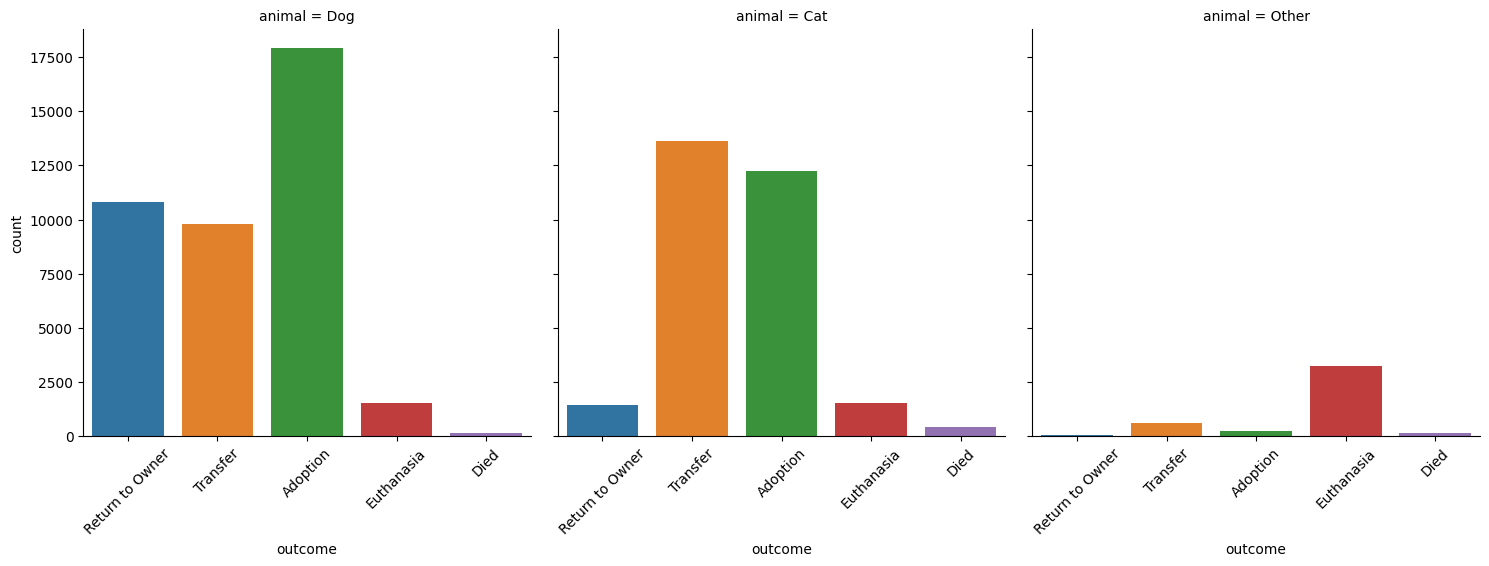

In [148]:
# Probably no point in keeping livestock and birds!
tmp_data = data.query('animal in ["Cat", "Dog", "Other"]')
# And also, let's get rid of outcomes with fewer than 500 entries
# Remember this filtering step from Day 2?
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 500)
x_var = 'outcome'
panel_var = 'animal' 

g = sns.catplot(x=x_var, data=tmp_data, col=panel_var, kind='count')
g.set_xticklabels(rotation=45);

The previous plot is kind of useful, so let's abstract it into a method. Then we can do the same thing (even more) quickly for other combinations of variables.

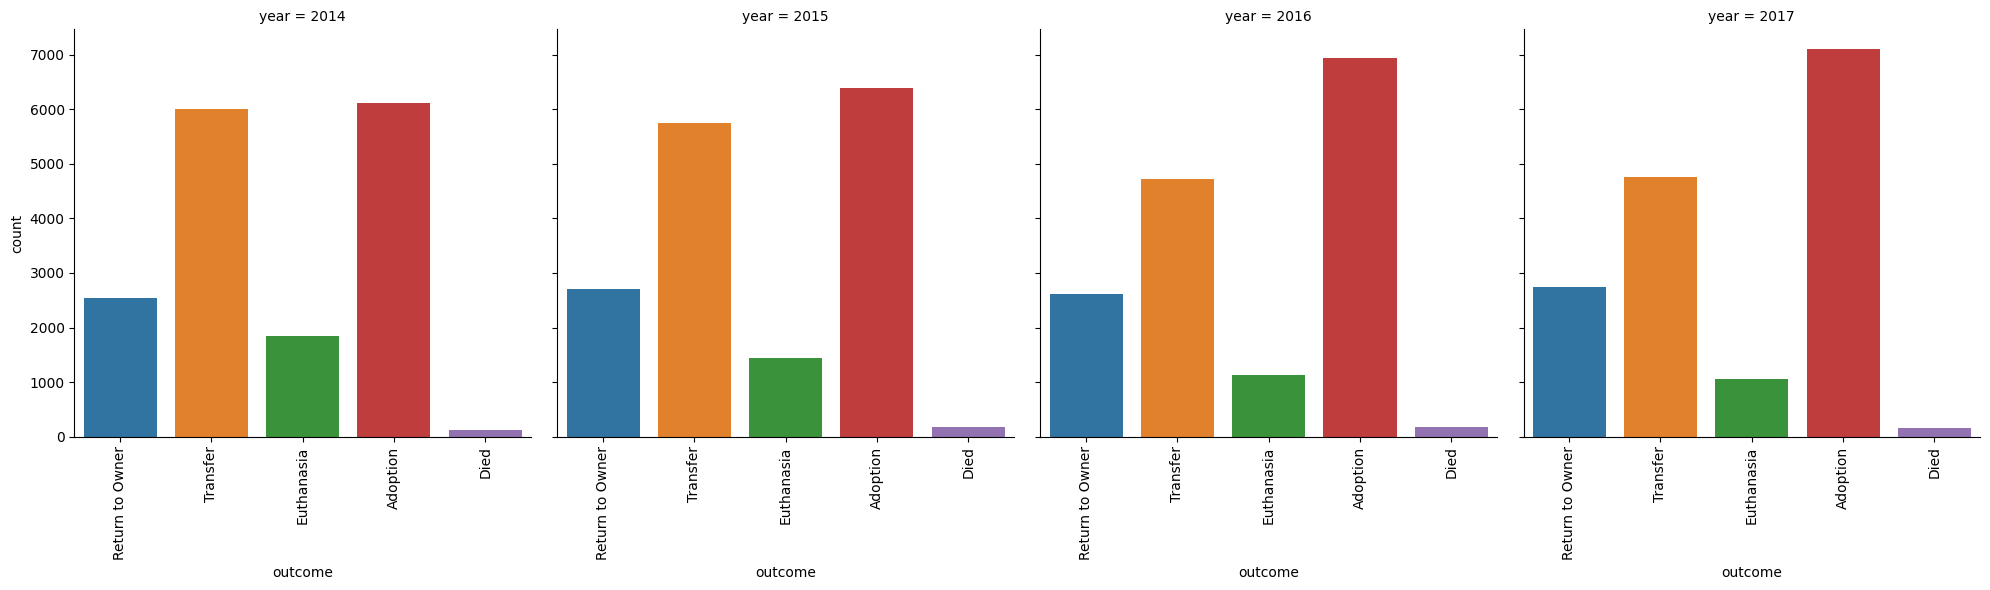

In [149]:
def aac_factorplot(data, x, facet, y=None, kind='count'):
    g = sns.catplot(x=x, data=data, y=y, col=facet, kind=kind)
    g.set_xticklabels(rotation=90)

# Let's restrict analysis to only full-year data.
years = [2014, 2015, 2016, 2017]
full_years = tmp_data.query('year in @years')
aac_factorplot(full_years, 'outcome', 'year')

#### Do temporal variables matter?
* We might expect day of the week to matter

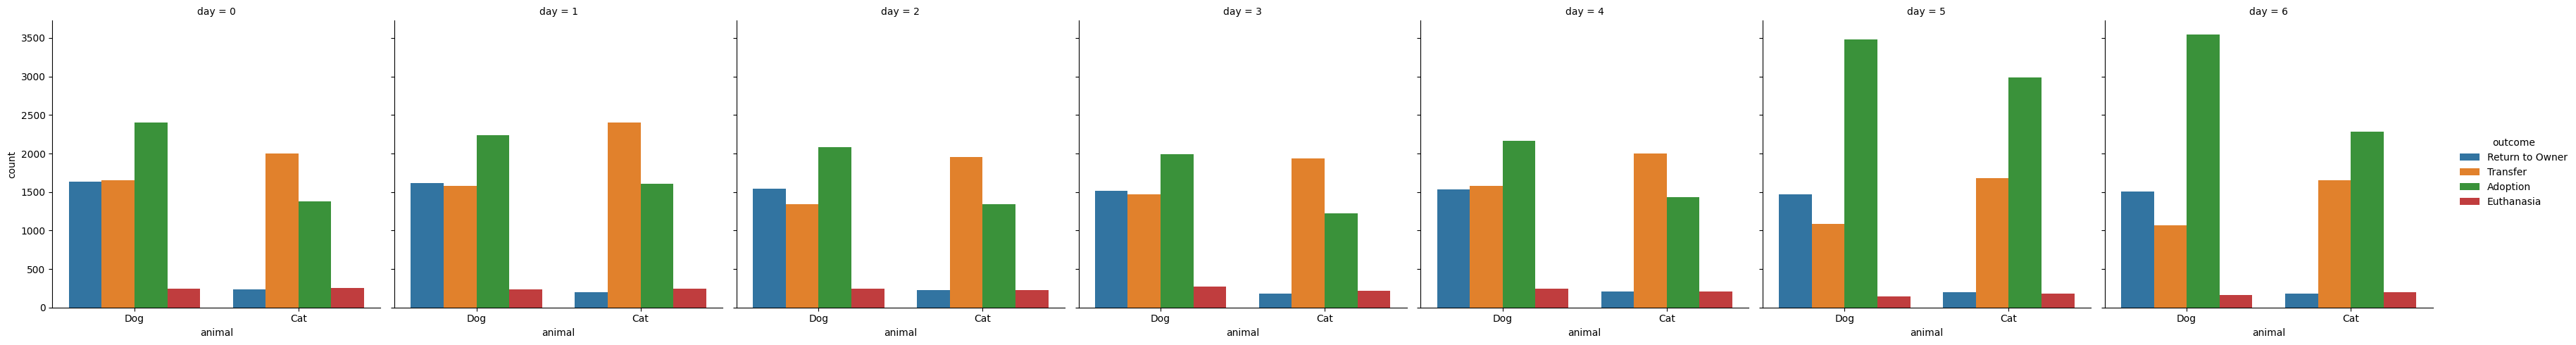

In [150]:
tmp_data = data[data['animal'].isin(['Dog', 'Cat'])]
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 1000)
sns.catplot(x='animal', data=tmp_data, hue='outcome', col='day', kind='count') ;

In [151]:
np.array([True,True]) & np.array([False,True])

array([False,  True])

#### What about age?

In [152]:
tmp_data = data[data['animal'].isin(['Dog', 'Cat'])]
#tmp_data = tmp_data.query('year > 2013 and year < 2017')
tmp_data = data[ data['year'].isin(['2014','2015','2016'])  ]
#tmp_data = data[ data['year']<2017 & data['year']>2013  ]
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 500)
sns.catplot(x='animal', y='age', data=tmp_data, hue='outcome', col='year', kind='bar');

ValueError: min() arg is an empty sequence

#### Color?

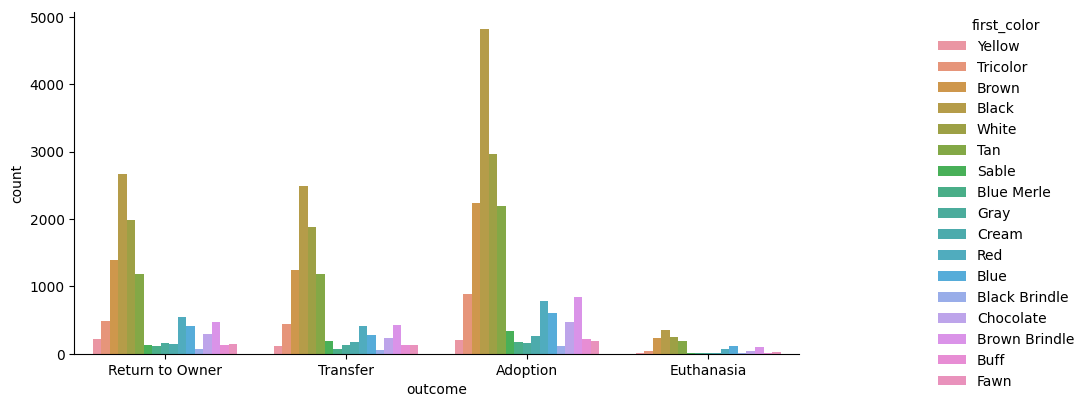

In [153]:
# Restrict to just dogs
tmp_data = data[data['animal'].isin(['Dog'])]

# Filter on colors with more than 200 rows and outcomes with more than 500
tmp_data = tmp_data.groupby('first_color').filter(lambda x: len(x) >= 200)
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 500)

# Plot!
sns.catplot(x='outcome', data=tmp_data, hue='first_color', kind='count')
plt.gcf().set_size_inches((12, 4))

# It would be nice if the colors matched the labels, but that would be more work...

### What about uncertainty?
* Thus far we've almost completely ignored estimation uncertainty
* Good visualization represents uncertainty in a clear way
* E.g., error bars, comparison distributions, etc.

#### Breed age with error bars in matplotlib

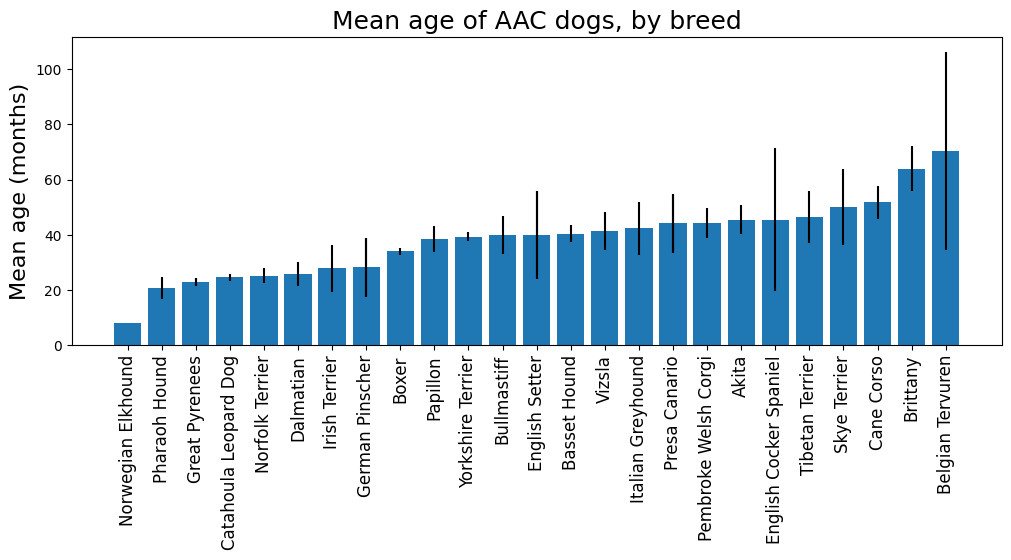

In [154]:
# Group by breed and get mean, standard deviation, and count for each breed
age_data = data.groupby('breed_name')['age'].aggregate(['mean', 'std', 'count'])
age_data['95ci'] = age_data['std']/np.sqrt(age_data['count'])

# Let's pick 30 random breeds, otherwise the plot will be too big
select_inds = np.random.choice(age_data.index, size=30)
age_data = age_data.loc[select_inds, :]

# Sort by ascending mean age
age_data = age_data.sort_values('mean')

# Rotate and align labels. Maybe place them at 45 degrees?
plt.xticks(rotation='vertical', fontsize=12)

# Bar plot with error bars
plt.bar(x=age_data.index, height=age_data['mean'], yerr=age_data['95ci'])

# Add y-axis label and title
plt.ylabel("Mean age (months)", fontsize=16)

# Title
plt.title("Mean age of AAC dogs, by breed", fontsize=18)

# Resize for legibility
plt.gcf().set_size_inches(12, 4)

#### Animal age with bootstrapped CIs in seaborn
* Let's estimate the mean age of different dog breeds, broken down by outcome and day of week
* By default, many seaborn plotting commands will bootstrap 95% confidence intervals

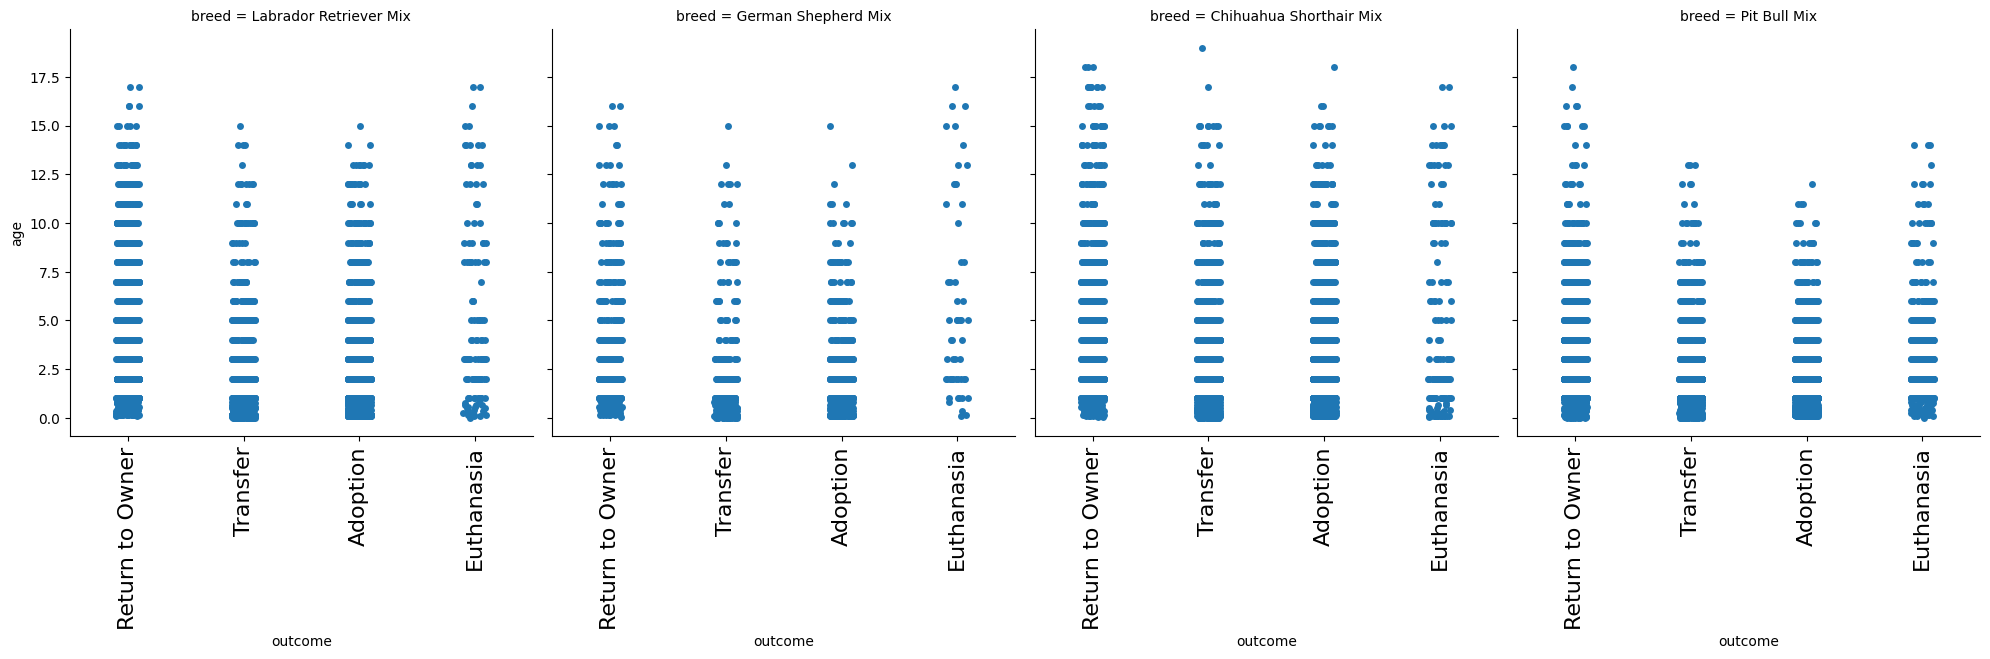

In [155]:
# Only dogs, cats, and other; the rest have too few observations
tmp_data = data.query('animal=="Dog"')

# Only the most common breeds
tmp_data = tmp_data.groupby('breed').filter(lambda x: len(x) >= 1000)

# Drop infrequent outcomes
tmp_data = tmp_data.groupby('outcome').filter(lambda x: len(x) >= 500)

# Display age in years
tmp_data['age'] /= 12.0

# Plot mean age by outcome on x-axis and separate columns for breeds
g = sns.catplot(x='outcome', data=tmp_data, y='age', col='breed')
g.set_xticklabels(rotation=90, fontsize=16);

# In-class exercise: compare the result with what we'd get
# without error bars. Would the conclusions we draw from the
# data change? What about if we add in some less frequent
# outcomes, breeds, etc.?

# Statistical analysis
* Python is historically not widely used for traditional statistics
    * It's improving fast, but will probably never catch up to R
* But it has decent support for many common techniques

## Statistical tools in SciPy
* The SciPy package includes a well-developed [stats module](http://docs.scipy.org/doc/scipy/reference/stats.html)
* Caters more to computational scientists than end users
    * Interface is heavily object-oriented
    * You usually have to take the extra step yourself
    * Performance is very good, but interface is clunky

### Lots of descriptives and convenience functions

In [156]:
# Descriptive statistics for age in months
print(stats.describe(data['age'].dropna()))

DescribeResult(nobs=74633, minmax=(0.0, 300.0), mean=25.378585880240646, variance=1230.6983623774495, skewness=2.2723879268034284, kurtosis=5.483697512046785)


In [157]:
# Plenty of little convenience functions
age = 60
percentile = stats.percentileofscore(data['age'], age)
print("\nA {}-month old animal is at the {:.0f}th percentile.".format(age, percentile)) 


A 60-month old animal is at the nanth percentile.


### Distributions a-plenty
* Large number of statistical [distributions](http://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
* All of the standard distribution functions (pdf, cdf, random sampling, etc.) 

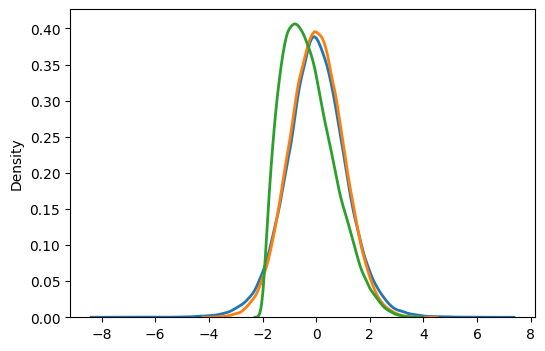

In [158]:
# Sample 100000 observations...
n = 100000

# ...from each of the normal, t(10), and beta(2, 5) distributions
normal = stats.norm.rvs(size=n)
t = stats.t.rvs(df=10, size=n)
beta = stats.beta.rvs(a=2, b=5, loc=-2, scale=6, size=n)

# Set up figure
ax = plt.figure(figsize=(6, 4)).gca()

# Plot a kde plot of each distribution
labels = ['t', 'normal', 'beta']
for i, dist in enumerate([t, normal, beta]):
    sns.kdeplot(dist, ax=ax, lw=2, label=labels[i])


In [159]:
# Use CDF of normal to convert p-values to z-scores
print(stats.norm.ppf(0.001))

-3.090232306167813


In [160]:
# t statistic to p-value
print(stats.t.cdf(1.46, df=22))

0.920788098527838


In [161]:
# Endpoints of interval containing 90% of distribution
print(stats.beta.interval(0.9, a=2, b=5))

(0.06284989170835437, 0.5818034092520259)


### Basic tests
* You can do things like t-tests and ANOVAs with SciPy if you really want
* But there are more pleasant ways

In [162]:
# Independent samples t-test: do cats and dogs processed at the center differ in age?

# Extract 
dog_age = data.query('animal=="Dog"')['age'].dropna()
cat_age = data.query('animal=="Cat"')['age'].dropna()

# ttest_ind returns a tuple of t and p values
t, p = stats.ttest_ind(dog_age, cat_age)

# Report means as well
dm, cm = dog_age.mean(), cat_age.mean()

# Print something for the user
print("Dogs (mean = {:.2f}) vs. Cats (mean = {:.2f}), t = {:.2f}, p={:.2g}".format(dm, cm, t, p))

Dogs (mean = 32.86) vs. Cats (mean = 16.87), t = 59.35, p=0


## [Statsmodels](http://statsmodels.sourceforge.net/devel/index.html#)
* Python's answer to base R
* It's not a great answer
* But it's getting there, and things [move quickly](https://github.com/statsmodels/statsmodels/issues)
* For common procedures, functionality is very similar to R

### What's in statsmodels
* Basic tests
* Linear models
* Diagnostics and specification tests
* Power calculations
* Multiple comparisons correction
* Time-series analysis
* Experimental support for many other things (e.g. mixed-effects models)

### Statsmodel examples
* Let's build a model to predict whether an animal is euthanized or not
* We'll use logistic regression using the formula interface
* We'll start by predicting euthanasia from just age, sex, and sterilization

In [169]:
import statsmodels.formula.api as smf

# Drop missing values from analysis
tmp_data = data[['outcome', 'age', 'sex', 'sterilized']].dropna()
print("Kept {} observations.".format(len(tmp_data)))

# # The dependent variable: whether the animal was euthanized
tmp_data['y'] = (tmp_data['outcome'] == 'Euthanasia').astype(int)

# Specify the model with a formula
model = smf.logit('y ~ age + sex * sterilized', data=tmp_data)

# Fit model and save result
result = model.fit()

# Print a user-friendly summary
result.summary()


Kept 67565 observations.
Optimization terminated successfully.
         Current function value: 0.157950
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                67565
Model:                          Logit   Df Residuals:                    67560
Method:                           MLE   Df Model:                            4
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1165
Time:                        14:28:24   Log-Likelihood:                -10672.
converged:                       True   LL-Null:                       -12079.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.5099      0.036    -68.968      0.000      -2.581      -2.439
age                0.0146      0.000     37.566      0.000       0.014       0.015
sex               -0.1828      0.051     -3.601      0.000      -0.282      -0.083
sterilized        -1.7178      0.053    -32.216      0.000      -1.822      -1.613
sex:sterilized    -0.1890      0.081     -2.343      0.019      -0.347      -0.031
==================================================================================
"""

### Adding categorical predictors
* Old animals are more likely to be euthanized
* Is this explained by differences in species, breed, etc.?
* We can add categorical predictors either by:
    * Constructing the dummy variables ourselves (e.g., with pandas)
    * Using the patsy module to do it in an R-like way

In [170]:
# There are nearly 1,800 unique values for breed in our data.
# We can't get a reasonable estimate for most of those; there
# are too few observations. Let's restrict analysis to
# common dog breeds--100 or more individuals.
tmp_data = data.query('animal=="Dog"')
tmp_data = tmp_data.groupby('breed').filter(lambda x: len(x) >= 100)

# The NaNs in some columns might cause problems; let's replace them
cols = ['sex', 'sterilized']
tmp_data[cols] = tmp_data[cols].fillna('Unknown')

# Explicitly add the dependent variable
tmp_data['y'] = (tmp_data['outcome'] == 'Euthanasia').astype(int)

# We can easily set up the design matrix with an R-style formula
from patsy import dmatrices
y, X = dmatrices('y ~ age + breed + C(sex) + C(sterilized)',
                 data=tmp_data, return_type='dataframe')

results = sm.Logit(y, X).fit()
results.summary()

         Current function value: 0.147986
         Iterations: 35


c:\Program Files\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                29351
Model:                          Logit   Df Residuals:                    29294
Method:                           MLE   Df Model:                           56
Date:                Wed, 05 Apr 2023   Pseudo R-squ.:                  0.1414
Time:                        14:28:35   Log-Likelihood:                -4343.5
converged:                      False   LL-Null:                       -5058.8
Covariance Type:            nonrobust   LLR p-value:                2.669e-262
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      -2.3782      0.284     -8.372      0.000      -2.935      -1.821
breed[T.American Pit Bull Terrier Mix]          0.4208      0.450      0.936      0.349      -0.460       1.302
breed[T.American Staffordshire Terrier Mix]     0.5706      0.399      1.431      0.152      -0.211       1.352
breed[T.Anatol Shepherd Mix]                   -1.6216      0.766     -2.116      0.034      -3.124      -0.120
breed[T.Australian Cattle Dog Mix]             -0.5472      0.341     -1.603      0.109      -1.216       0.122
breed[T.Australian Kelpie Mix]                 -0.9235      0.584     -1.583      0.113      -2.067       0.220
breed[T.Australian Shepherd Mix]               -0.4958      0.389     -1.275      0.202      -1.258       0.266
breed[T.Basset Hound Mix]                      -0.2026      0.547     -0.371      0.711      -1.274       0.869
breed[T.Beagle Mix]                            -1.2912      0.502     -2.572      0.010      -2.275      -0.307
breed[T.Black Mouth Cur Mix]                   -0.8792      0.649     -1.355      0.176      -2.151       0.393
breed[T.Border Collie Mix]                     -0.6315      0.379     -1.664      0.096      -1.375       0.112
breed[T.Border Terrier Mix]                   -15.3245    966.450     -0.016      0.987   -1909.533    1878.884
breed[T.Boxer Mix]                             -0.2238      0.347     -0.645      0.519      -0.904       0.456
breed[T.Cairn Terrier Mix]                     -1.0784      0.537     -2.010      0.044      -2.130      -0.027
breed[T.Catahoula Mix]                         -0.3521      0.402     -0.876      0.381      -1.140       0.436
breed[T.Chihuahua Longhair Mix]                -0.7881      0.423     -1.862      0.063      -1.618       0.041
breed[T.Chihuahua Shorthair]                   -1.2950      0.551     -2.352      0.019      -2.374      -0.216
breed[T.Chihuahua Shorthair Mix]               -0.6923      0.294     -2.356      0.018      -1.268      -0.116
breed[T.Chihuahua Shorthair/Dachshund]         -1.2303      0.649     -1.897      0.058      -2.502       0.041
breed[T.Chow Chow Mix]                          0.4916      0.391      1.258      0.209      -0.275       1.258
breed[T.Cocker Spaniel Mix]                    -0.6681      0.562     -1.189      0.234      -1.769       0.433
breed[T.Dachshund Mix]                         -1.0225      0.377     -2.715      0.007      -1.761      -0.284
breed[T.Dachshund/Chihuahua Shorthair]         -0.3596      0.541     -0.665      0.506      -1.419       0.700
breed[T.Doberman Pinsch Mix]                   -0.0161      0.521     -0.031      0.975      -1.036       1.004
breed[T.German Shepherd]                       -0.3426      0.446     -0.768      0.443      -1.217       0.532
breed[T.German Shepherd Mix]                   -0.5937      0.315     -1.883      0.060      -1.212      

In [165]:
# The coefficients are in logit space; we can convert them to odds ratios
np.exp(results.params).sort_values()

breed[T.Miniature Pinscher Mix]                3.480414e-09
breed[T.Border Terrier Mix]                    2.211268e-07
breed[T.Pomeranian Mix]                        7.487105e-02
breed[T.Shih Tzu]                              8.835931e-02
Intercept                                      9.271333e-02
breed[T.Pug Mix]                               9.364619e-02
breed[T.Pointer Mix]                           1.923523e-01
breed[T.Golden Retriever Mix]                  1.968658e-01
breed[T.Anatol Shepherd Mix]                   1.975804e-01
C(sterilized)[T.1.0]                           2.158803e-01
breed[T.Shih Tzu Mix]                          2.640348e-01
breed[T.Lhasa Apso Mix]                        2.691762e-01
breed[T.Labrador Retriever]                    2.710642e-01
breed[T.Chihuahua Shorthair]                   2.738943e-01
breed[T.Beagle Mix]                            2.749360e-01
breed[T.Chihuahua Shorthair/Dachshund]         2.922163e-01
breed[T.Maltese Mix]                    

### Should you do classical statistics in Python?
* In the interest of providing a fair overview...
* If you plan to do a lot of classical inference (t-tests, ANOVAs, MLMs...), you will probably have an easier time in R
    * Though a lot of standard have scikit-learn implementations
* If you want to do probabilistic programming, machine learning, or deep learning, Python shines
    * We'll cover some of this next notebook

In [189]:
x = np.arange(-6, 6.0001, 0.001)
x

array([-6.   , -5.999, -5.998, ...,  5.998,  5.999,  6.   ])

In [190]:
np.exp(x)

array([2.47875218e-03, 2.48123217e-03, 2.48371464e-03, ...,
       4.02622742e+02, 4.03025566e+02, 4.03428793e+02])

In [191]:
y = 1/(1+np.exp(-x))
y

array([0.00247262, 0.00247509, 0.00247756, ..., 0.99752244, 0.99752491,
       0.99752738])

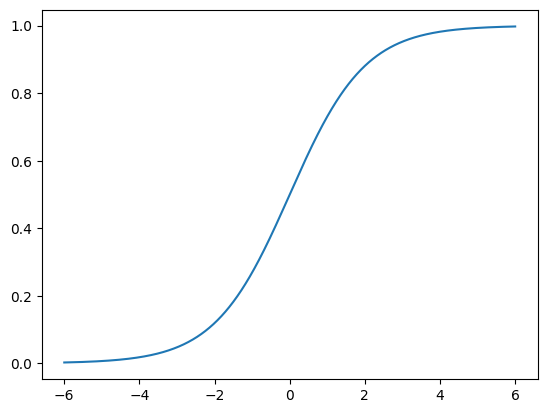

In [192]:
plt.plot(x,y)

In [193]:
1/(1+np.exp(-0))

0.5